**ids-pdl07-tut.ipynb**: This Jupyter notebook is provided by Joachim Vogt for the _Python Data Lab_ of the module _Introduction to Data Science_ offered in Fall 2022 at Jacobs University Bremen. Module instructors are Hilke Brockmann, Adalbert Wilhelm, and Joachim Vogt. Jupyter notebooks and other learning resources are available from a dedicated _module platform_.

# Python scripts and functions

This tutorial is concerned with Python scripts and functions. The underlying concepts are demonstrated by means of a basic operation in signal processing, namely, finite differencing applied to discrete variables. Follow the instructions below to learn to

- [ ] apply the finite differencing operation to NumPy arrays,
- [ ] compute numerical approximations of function derivatives,
- [ ] store and run Python script files,
- [ ] compose and call Python functions, 
- [ ] save and import Python functions,
- [ ] work with NumPy polynomial objects.

If you wish to keep track of your progress, you may edit this markdown cell, check a box in the list above after having worked through the respective part of this notebook, and save the file.

*Short exercises* are embedded in this notebook. *Sample solutions* can be found at the end of the document.

## Preparation

The following Python script and module files are expected to reside in the working directory. Identify the files on the module platform and upload them to the same folder as this Jupyter notebook.

- `print_dfodx.py`: sample script file provided for the section *Python scripts*.
- `eqdist.py`: sample module file provided for the section *Function imports*.

Run the following code cell to import standard Python data science libraries. The NumPy module facilitates efficient processing of numerical arrays, and is usually imported as `np`. From the matplotlib library we import the package `pyplot` using the standard abbreviation `plt`. The magic command `%matplotlib inline` (IPython shell) allows for inline display of graphics.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Differencing of discrete variables

Differencing of discrete variables is a basic operation entering a variety of data analysis and modeling tasks such as approximating rates of change or finding data gaps in time series.

### Efficient differencing of NumPy arrays

Consider a NumPy array `x`. The arrays `x[1:]`  and `x[:-1]` extract sub-arrays with elements `x[1],x[2],...,x[-1]` and `x[0],x[1],x[2],...,x[-2]`, respectively.

In [4]:
x = np.array([1,2,4,6,7,8])
print('Array x=x[:] :',x[:])
print('Array x[1:]  :',x[1:])
print('Array x[:-1] :',x[:-1])

Array x=x[:] : [1 2 4 6 7 8]
Array x[1:]  : [2 4 6 7 8]
Array x[:-1] : [1 2 4 6 7]


The set of differences `x[1]-x[0],x[2]-x[1],x[3]-x[2],...` (i.e., $x_{j+1}-x_j,j=0,1,2,\ldots$) are thus elements of the array `x[1:]-x[:-1]`.

In [5]:
x = np.array([1,2,4,6,7,8])
dx = x[1:] - x[:-1]
print('Array x     : ',x)
print('Differences : ',dx)

Array x     :  [1 2 4 6 7 8]
Differences :  [1 2 2 1 1]


The same procedure can be applied to obtain the set of arithmetic means $\bar{x}_j = \frac{1}{2}(x_{j+1}+x_j), j=0,1,2,\ldots$ of successive elements in a numerical array.

In [6]:
x = np.array([1,2,4,6,7,8],dtype=float)
xm = 0.5*( x[1:] + x[:-1] )
print('Array x          : ',x)
print('Arithmetic means : ',xm)

Array x          :  [1. 2. 4. 6. 7. 8.]
Arithmetic means :  [1.5 3.  5.  6.5 7.5]


### Numerical differentiation

Suppose an ordinary function $f = f(x)$ is approximated by discrete values $f_0,f_1,f_2,\ldots$ on a numerical grid $x_0,x_1,x_2,\ldots$, then the so-called *centered finite differencing approximation* $f^\ast_j = f^\ast (\bar{x}_j)$ of the derivative $f'(x) = \frac{\mathrm{d} f}{\mathrm{d} x}$ is given by
$$
f^\ast_j \; = \; \frac{f_{j+1}-f_j}{x_{j+1}-x_j} ~,~ j=0,1,2,\ldots
$$
This approximation is second-order accurate, implying that the derivatives of quadratic polynomials at points $\bar{x}_j = \frac{1}{2}(x_{j+1}+x_j), j=0,1,2,\ldots$ are reproduced exactly.

In [7]:
### Define and display numerical grid x and grid function f.
x = np.array([1,2,4,6,7,8],dtype=float)
f = x**2 - 5*x - 8
print('Grid     x : ',x)
print('Function f : ',f)
print()

### Compute arithmetic means and differences.
xm = 0.5*( x[1:] + x[:-1] )
dx = x[1:] - x[:-1]
df = f[1:] - f[:-1]

### Compute approximate and exact derivatives.
dfodx_approx = df/dx
dfodx_exact  = 2*xm - 5

### Print results.
print('First derivative of function f')
print('* Array of arithmetic means         : ',xm)
print('* Finite differencing approximation : ',dfodx_approx)
print('* Evaluation of exact derivative    : ',dfodx_exact)

Grid     x :  [1. 2. 4. 6. 7. 8.]
Function f :  [-12. -14. -12.  -2.   6.  16.]

First derivative of function f
* Array of arithmetic means         :  [1.5 3.  5.  6.5 7.5]
* Finite differencing approximation :  [-2.  1.  5.  8. 10.]
* Evaluation of exact derivative    :  [-2.  1.  5.  8. 10.]


### Exercise: Differencing of discrete variables

Repeat the previous example using the same numerical grid `x` but evaluating the cubic function $f(x) = x^3 - 9x^2 + 80$. Convince yourself that the centered differencing approximation does not exactly reproduce the values of the first derivative $f'(x) = 3 x^2 - 18x$.

In [8]:
### Define numerical grid x and grid function f.

### Compute arithmetic means and differences.

### Compute approximate and exact derivatives.

### Print results.


## Python scripts

A Python script consists of a series of instructions that are executed as a block. Python scripts are usually stored as separate files with the extension `.py`, and can then be run, e.g., within an IPython shell (or Jupyter notebook code cell) or from the terminal prompt. Suppose the script is named `script.py`, then in a terminal window enter after the prompt:

    python script.py

In an IPython shell, you may run the script with or without the extension `.py` using the magic command `%run`:

    %run script.py
    %run script

To demonstrate the syntax and the underlying logic, reconsider the example from the previous section. Necessary imports need to be included to make the script self-contained. The instructions are assembled in the following code cell.

In [9]:
### Include necessary imports.
import numpy as np

### Define and display numerical grid x and grid function f.
x = np.array([1,2,4,6,7,8],dtype=float)
f = x**2 - 5*x - 8
print('Grid     x : ',x)
print('Function f : ',f)
print()

### Compute arithmetic means and differences.
xm = 0.5*( x[1:] + x[:-1] )
dx = x[1:] - x[:-1]
df = f[1:] - f[:-1]

### Compute approximate and exact derivatives.
dfodx_approx = df/dx
dfodx_exact  = 2*xm - 5

### Print results.
print('First derivative of function f')
print('* Array of arithmetic means         : ',xm)
print('* Finite differencing approximation : ',dfodx_approx)
print('* Evaluation of exact derivative    : ',dfodx_exact)

Grid     x :  [1. 2. 4. 6. 7. 8.]
Function f :  [-12. -14. -12.  -2.   6.  16.]

First derivative of function f
* Array of arithmetic means         :  [1.5 3.  5.  6.5 7.5]
* Finite differencing approximation :  [-2.  1.  5.  8. 10.]
* Evaluation of exact derivative    :  [-2.  1.  5.  8. 10.]


The same series of instructions can be found in the file `print_dfodx.py`. In the browser currently running this Jupyter notebook, select the tab showing the working directory and click on the file. In the new tab that opens, the file content is displayed and may be modified. At present we do not change the file but simply run `print_dfodx.py` by executing the following code cell.

In [10]:
%run print_dfodx.py

Grid     x :  [1. 2. 4. 6. 7. 8.]
Function f :  [-12. -14. -12.  -2.   6.  16.]

First derivative of function f
* Array of arithmetic means         :  [1.5 3.  5.  6.5 7.5]
* Finite differencing approximation :  [-2.  1.  5.  8. 10.]
* Evaluation of exact derivative    :  [-2.  1.  5.  8. 10.]


To demonstrate execution in a terminal window, go back to the browser tab showing the working directory, click on the `New` button and select `Terminal`. After the prompt enter

    python print_dfodx.py

Execution of the script in a stand-alone IPython shell can also be demonstrated using the open terminal window. After the prompt enter

    ipython

to open an IPython shell, then enter

    %run print_dfodx.py

or

    %run print_dfodx

Now return to the tab showing the content of the file `print_dfodx.py`. In the definition of the function `f`, change the constant coefficient from `-8` to `-4` so that the function definition reads `f = x**2 - 5*x - 4` (this should affect the function values but not the derivatives). Save the modified file, then run the script again. If you want to distinguish the two versions, you may store the new file under another name such as `print_dfodx_modified.py` before running the script.

In [11]:
#%run print_dfodx
%run print_dfodx_modified

Grid     x :  [1. 2. 4. 6. 7. 8.]
Function f :  [ -8. -10.  -8.   2.  10.  20.]

First derivative of function f
* Array of arithmetic means         :  [1.5 3.  5.  6.5 7.5]
* Finite differencing approximation :  [-2.  1.  5.  8. 10.]
* Evaluation of exact derivative    :  [-2.  1.  5.  8. 10.]


### Exercise: Python scripts

In the following cell, a numerical grid and a grid function are defined, exact and approximate derivatives are computed, and the results are graphically displayed. Familiarize with the code and run the cell.

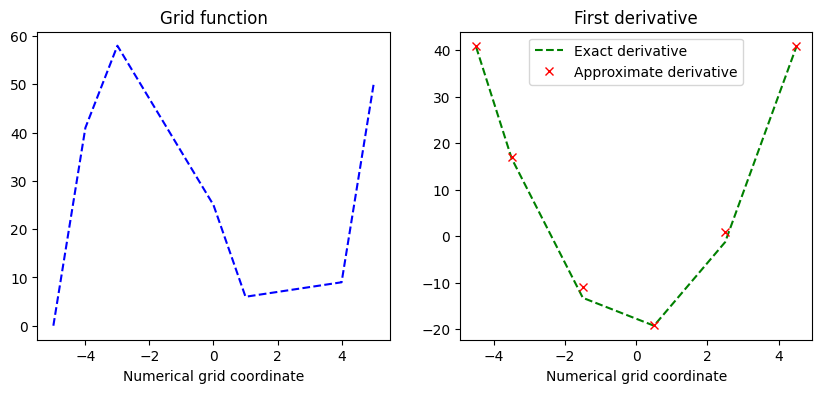

In [12]:
### Define and display numerical grid x and grid function f.
x = np.array([-5,-4,-3,0,1,4,5],dtype=float)
f = x**3 - 20*x + 25

### Compute arithmetic means and differences.
xm = 0.5*( x[1:] + x[:-1] )
dx = x[1:] - x[:-1]
df = f[1:] - f[:-1]

### Compute approximate and exact derivatives.
dfodx_approx = df/dx
dfodx_exact  = 3*xm**2 - 20

### Plot results.
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(x,f,'b--')
axs[0].set_title('Grid function')
axs[0].set_xlabel('Numerical grid coordinate')
axs[1].plot(xm,dfodx_exact,'g--',label='Exact derivative')
axs[1].plot(xm,dfodx_approx,'rx',label='Approximate derivative')
axs[1].set_title('First derivative')
axs[1].set_xlabel('Numerical grid coordinate')
axs[1].legend()

In the browser currently running this Jupyter notebook, click on `New` and select `Text File`. A new tab opens for storing a file. Rename the file to `plot_dfodx.py`. Copy the content of the cell above (e.g., using your mouse) and paste it into the interface offered under the new tab. Add the necessary imports to make your script self-contained. Change the linestyle from dashed (`--`) to dotted (`:`), and the red crosses (`rx`) to black diamonds. Save the file and run the script.

In [ ]:
%run plot_dfodx

## Python functions

Compared to scripts, Python functions are characterized by a well-defined interface for exchanging information. Variables are accepted on input, and returned on output. Unless explicitly enforced, instructions and variable assignments are not visible to the calling instance (e.g., IPython shell, script, function). The basic syntax of Python functions is as follows.

    def funct(arg1,arg2,...,kwarg1=def1,kwarg2=def2,...):
        ''' docstring: brief description of the function '''
        <statement>
        <statement>
        ...
        return var1,var2,...
        
Here `funct` is the name of the function, `arg1,arg2,...` are mandatory input variables (arguments), `kwarg1,kwarg2,...` are optional input variables (keyword arguments) with corresponding default values `def1,def2,...`, and `var1,var2,...` are the output variables. The so-called `docstring` gives a brief characterization of the function that is displayed when `help(funct)` is entered.

### Arguments and return variables

To demonstrate the syntax and the underlying logic in the cell below, the centered differencing approximation of the first derivative is provided through the function `numdif()`.

In [13]:
def numdif(x,f):
    '''
    Centered differencing approximation of the first derivative.
    Arguments
    * x     : numerical grid.
    * f     : grid function.
    On return
    * dfodx : approximation of the first derivative.
    * xm    : arithmetic means of consecutive numerical grid points.
    '''
    dx = x[1:] - x[:-1]
    df = f[1:] - f[:-1]
    dfodx = df/dx
    xm = 0.5*( x[1:] + x[:-1] )
    return dfodx,xm

After running the above code cell, the function `numdif()` is available in the current Python/notebook session, as can be checked by displaying the docstring.

In [14]:
help(numdif)

Help on function numdif in module __main__:

numdif(x, f)
    Centered differencing approximation of the first derivative.
    Arguments
    * x     : numerical grid.
    * f     : grid function.
    On return
    * dfodx : approximation of the first derivative.
    * xm    : arithmetic means of consecutive numerical grid points.



Using `numdif()`, the code to compute approximate derivatives assumes a more compact form.

In [ ]:
### Define and display numerical grid x and grid function f.
x = np.array([1,2,4,6,7,8],dtype=float)
f = x**2 - 5*x - 8
print('Grid     x : ',x)
print('Function f : ',f)
print()

### Compute approximate derivatives and arithmetic means.
dfodx_approx,xm = numdif(x,f)

### Compute exact derivatives.
dfodx_exact = 2*xm - 5

### Print results.
print('First derivative of function f')
print('* Array of arithmetic means         : ',xm)
print('* Finite differencing approximation : ',dfodx_approx)
print('* Evaluation of exact derivative    : ',dfodx_exact)

### Keyword arguments

To illustrate the concept of keyword arguments, consider the task of creating an equidistant numerical grid with a total of `N` points starting at an initial position `xinit`. The grid spacing `deltax` is implemented as a keyword parameter defaulting to unity (`deltax=1`).

In [ ]:
def eqdistgrid(xinit,N,deltax=1):
    '''
    Create equidistant numerical grid.
    Arguments
    * xinit  : initial grid coordinate.
    * N      : total number of grid points.
    Keyword arguments
    * deltax : grid spacing.
    On return
    * grid   : equidistant numerical grid.
    '''
    grid = np.linspace(xinit,xinit+(N-1)*deltax,N)
    return grid

After running the code cell above, the function `eqdistgrid()` can be called in any way indicated in the following cell. Study the instructions and anticipate the results. Which statement produces an error message? Uncomment individual lines to check your prediction.

In [ ]:
print(eqdistgrid(1,5,deltax=2))
#print(eqdistgrid(1,5,2))
#print(eqdistgrid(1,5))
#print(eqdistgrid(1))

In addition to the `def` syntax, Python offers also the so-called `lambda` mechanism for defining functions. The definitions in the two code cells below implement the same function.

In [ ]:
def f(x,y,z=0): return x**2-y+z

In [ ]:
f = lambda x,y,z=0: x**2-y+z

For further information on the `lambda` mechanism see the Python documentation.

### Exercise: Python functions

This exercise is concerned with a basic time series filtering operation called *boxcar smoothing*. An equidistant time grid is assumed. With an input time series $u_0,u_1,u_2,\ldots,u_N$ and an assumed half-width $h$ of the boxcar filter, an element $v_k$ of the output series is the average of the input elements within $\pm h$ around index $k$:
$$
v_k = \frac{1}{2h+1} \sum_{j=-h}^h u_k ~,~ k=h,h+1,\ldots,N-h-1,N-h ~.
$$
For simplicity, the elements $v_k$ within half-width $h$ of the left and right boundary ($k=0,1,\ldots,h-1$ and $k=N-h+1,\ldots,N-1,N$) are to be set to $u_k$, i.e., the respective elements of the input time series.

In the code cell below, replace the `pass` statement in the function `boxcar()` with an implementation of the filtering operation. Run the cell to plot the filtered signal together with the input time series.

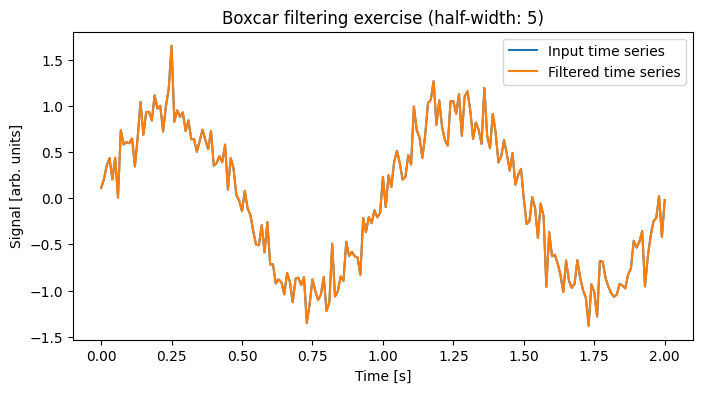

In [15]:
def boxcar(u,h=1):
    '''
    Boxcar filtering in the interior of a time series u.
    Arguments
    * u : input time series.
    Keyword arguments
    * h : filter half-width.
    On return
    * v : filtered time series.
    '''
    v = u.copy()
    #.. Implement boxcar filter using a for loop.
    for k in range(h,len(u)-h+1):
        pass
    return v

### Define uniform time array.
t = np.linspace(0,2,201)

### Generate sinusoidal signal contaminated by noise.
u = np.sin(2*np.pi*t) + 0.2*np.random.randn(len(t))

### Produce the filtered signal.
halfwidth = 5
v = boxcar(u,h=halfwidth)

### Plot input and filtered signal.
plt.figure(figsize=(8,4))
plt.plot(t,u,label='Input time series')
plt.plot(t,v,label='Filtered time series')
plt.title('Boxcar filtering exercise (half-width: {})'.format(halfwidth))
plt.xlabel('Time [s]')
plt.ylabel('Signal [arb. units]')
plt.legend()

## Function imports

Python functions can be stored in modules and then imported. In this section of the notebook, function file handling is explained using numerical differentiation restricted to the case of equidistant numerical grids. The values
$$
f^\ast_j \; = \; \frac{f_{j+1}-f_{j-1}}{2 \Delta x} ~,~ j=1,2,\ldots
$$
are second-order approximations of the first derivative $f'(x) = \frac{\mathrm{d} f}{\mathrm{d} x}$ on the interior points of the numerical grid (i.e., the left and right boundary points are excluded).

This formula is implemented in the function `eqdistdif1()` as part of the file `eqdist.py`, representing a minimal module (with two functions) available through the `import` mechanism. As before, select the browser tab showing the working directory and click on the file `eqdist.py`. Importing the module creates a dedicated namespace.

In [ ]:
import eqdist
#help(eqdist)

The usage of the two functions is demonstrated below.

In [ ]:
### Define and display numerical grid x and grid function f.
x = eqdist.eqdistgrid(-5,21,deltax=0.5)
f = x**3 - 20*x + 25

### Compute approximate and exact derivatives.
dfodx_approx = eqdist.eqdistdif1(f,deltax=0.5)
xint = x[1:-1]
dfodx_exact  = 3*xint**2 - 20

### Plot results.
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(x,f,'b--')
axs[0].set_title('Grid function')
axs[0].set_xlabel('Numerical grid coordinate')
axs[1].plot(xint,dfodx_exact,'g--',label='Exact derivative')
axs[1].plot(xint,dfodx_approx,'rx',label='Approximate derivative')
axs[1].set_title('First derivative')
axs[1].set_xlabel('Numerical grid coordinate')
axs[1].legend()

### Exercise: Function imports

Create a module file named `myfilter.py` containing the two functions `eqdistgrid()` and `boxcar()`. Run the following cell to check if the module was correctly saved.

In [ ]:
### Import the newly created module myfilter.
import myfilter

### Generate time array and noisy sinusoidal signal.
t = myfilter.eqdistgrid(0,201,deltax=0.01)
u = np.sin(2*np.pi*t) + 0.2*np.random.randn(len(t))

### Apply boxcar filter to the noisy signal.
halfwidth = 5
v = myfilter.boxcar(u,h=halfwidth)

### Plot noisy input signal and filtered time series.
plt.figure(figsize=(8,4))
plt.plot(t,u,label='Input time series')
plt.plot(t,v,label='Filtered time series')
plt.title('Boxcar filtering exercise (half-width: {})'.format(halfwidth))
plt.xlabel('Time [s]')
plt.ylabel('Signal [arb. units]')
plt.legend()

## Polynomial objects in NumPy

In preparation of the homework assignments associated with this tutorial, NumPy polynomial objects are briefly summarized. A polynomial is defined using its coefficients stored in a list. The example below creates a polynomial object for $p(x) = 1 + 2x + 3x^2$ so that the list of coefficients is `[1,2,3]`.

In [17]:
from numpy.polynomial import Polynomial
p = Polynomial([4,3,2,1])
print('Polynomial:')
display(p)

Polynomial:


Polynomial([4., 3., 2., 1.], domain=[-1,  1], window=[-1,  1])

To numerically evaluate the function, polynomial objects accept single values or NumPy arrays.

In [ ]:
print('p(1) = ',p(1))
x = np.arange(-2,3,dtype=float)
print('x    = ',x)
print('p(x) = ',p(x))

Derivatives of polynomial objects are available through the attribute `deriv`.

In [18]:
print('First derivative:')
display(p.deriv())
print('Second derivative:')
display(p.deriv(m=2))

First derivative:


Polynomial([3., 4., 3.], domain=[-1.,  1.], window=[-1.,  1.])

Second derivative:


Polynomial([4., 6.], domain=[-1.,  1.], window=[-1.,  1.])

---
---

## Solutions

### Solution: Differencing of NumPy arrays

In [ ]:
### Define numerical grid x and grid function f.
x = np.array([1,2,4,6,7,8],dtype=float)
f = x**3 - 9*x**2 + 80
print('Grid     x : ',x)
print('Function f : ',f)
print()

### Compute arithmetic means and differences.
xm = 0.5*( x[1:] + x[:-1] )
dx = x[1:] - x[:-1]
df = f[1:] - f[:-1]

### Compute approximate and exact derivatives.
dfodx_approx = df/dx
dfodx_exact  = 3*xm**2 - 18*xm

### Print results.
print('First derivative of function f')
print('* Array of arithmetic means         : ',xm)
print('* Finite differencing approximation : ',dfodx_approx)
print('* Evaluation of exact derivative    : ',dfodx_exact)

### Solution: Python scripts

See the file `plot_dfodx_solution.py` on the module platform.

### Solution: Python functions

In [ ]:
def boxcar(u,h=1):
    '''
    Boxcar filtering in the interior of a time series u.
    Arguments
    * u : input time series.
    Keyword arguments
    * h : filter half-width.
    On return
    * v : filtered time series.
    '''
    v = u.copy()
    #.. Implement boxcar filter using a for loop.
    for k in range(h,len(u)-h+1):
        v[k] = u[k-h:k+h+1].sum()/(2*h+1)
    return v

### Define uniform time array.
t = np.linspace(0,2,201)

### Generate sinusoidal signal contaminated by noise.
u = np.sin(2*np.pi*t) + 0.2*np.random.randn(len(t))

### Produce the filtered signal.
halfwidth = 5
v = boxcar(u,h=halfwidth)

### Plot input and filtered signal.
plt.figure(figsize=(8,4))
plt.plot(t,u,label='Input time series')
plt.plot(t,v,label='Filtered time series')
plt.title('Boxcar filtering exercise (half-width: {})'.format(halfwidth))
plt.xlabel('Time [s]')
plt.ylabel('Signal [arb. units]')
plt.legend()

### Solution: Function imports

See the file `myfilter_solution.py` on the module platform.

---
---